In [36]:
import numpy as np 
import pandas as pd 
import sklearn as skl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

#mnist = fetch_openml('mnist_784', as_frame=False)

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

X_train, X_test, y_train, y_test = mnist.data[:60000], mnist.data[60000:], mnist.target[:60000], mnist.target[6000:]

#### Training a Binary Classifier with Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

#### Testing Accuracy using Cross-Validation

In [51]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### Testin Accuracy using Dummy Classifier

In [55]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred), f1_score(y_train_5, y_train_pred), roc_auc_score(y_train_5, y_scores)

(0.8370879772350012,
 0.6511713705958311,
 0.7325171197343847,
 0.9604938554008616)

In [94]:
from sklearn.ensemble import RandomForestClassifier

#forest_clf = RandomForestClassifier(random_state=42)

#forest_clf.fit(X_train, y_train_5)

y_train_pred = forest_clf.predict(X_train)

y_scores = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')[:, 1]

precision_score(y_train_5, y_scores >= 0.5), recall_score(y_train_5, y_scores >= 0.5), f1_score(y_train_5, y_scores >= 0.5), roc_auc_score(y_train_5, y_scores)

(0.9897468089558485,
 0.8725327430363402,
 0.9274509803921569,
 0.9983436731328145)

## Multiclass Classification

In [97]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

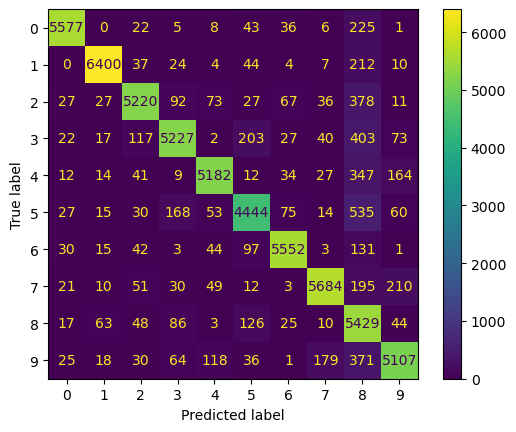

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

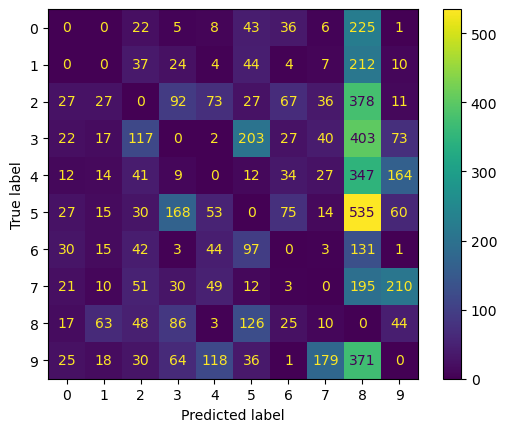

In [156]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, 
                        sample_weight = (y_train_pred != y_train), 
                        values_format='.0f')

In [178]:
def populate_grid(ax, data, row_start, row_end, col_start, col_end):
    index = 0

    blank_img = np.zeros((28, 28))

    for i in range(row_start, row_end):
        for j in range(col_start, col_end):

            try:
                ax[i, j].imshow(data[index].reshape(28, 28), cmap='binary')
            except IndexError:
                blank_img = np.zeros((28, 28))

            ax[i, j].axis('off')
            index += 1

# Populate each quadrant

def show_confusion_grid(cl_a, cl_b, size):

    fig, ax = plt.subplots(2 * size, 2 * size, figsize=(size*1.5, size*1.5))

    # Extract subsets based on actual and predicted labels
    X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
    X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
    X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
    X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

    populate_grid(ax, X_aa, 0, size, 0, size)
    populate_grid(ax, X_ab, size, 2 * size, 0, size)
    populate_grid(ax, X_ba, 0, size, size, 2 * size)
    populate_grid(ax, X_bb, size, 2 * size, size, 2 * size)

    ax[0, 0].set_title(f'Verdadeiro {cl_a}', fontsize=10)
    ax[size, 0].set_title(f'Falso {cl_b}', fontsize=10)
    ax[0, size].set_title(f'Falso {cl_a}', fontsize=10)
    ax[size, size].set_title(f'Verdadeiro {cl_b}', fontsize=10)

    plt.show()

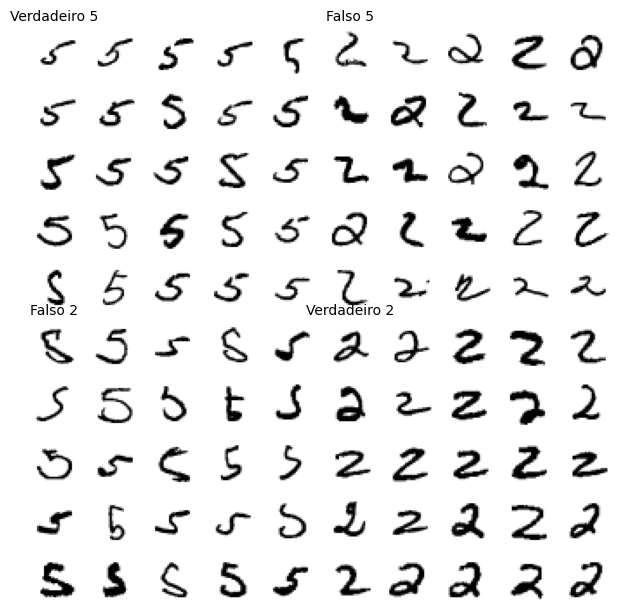

In [181]:
show_confusion_grid('5', '2', 5)